In [3]:
import pandas as pd

train_df = pd.read_csv('../NLP_dataset/train.csv')
test_df = pd.read_csv('../NLP_dataset/test.csv')
dev_df = pd.read_csv('../NLP_dataset/dev.csv')

In [138]:
train_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### source와 label의 피어슨 상관계수

In [139]:
import torch
from torchmetrics import PearsonCorrCoef
from collections import Counter



target = train_df['source']
target_cnt = Counter(target)
target_dict = {}
i = 1
for key, value in target_cnt.items():
    target_dict[key] = i
    i += 1

print(target_dict)

def to_number(elem):
    return target_dict[elem]


target_tensor = torch.FloatTensor(list(map(to_number, train_df['source'])))
preds_tensor = torch.FloatTensor(train_df['label'])

pearson = PearsonCorrCoef()
pearson(preds_tensor, target_tensor) #low positive correlation

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'nsmc-sampled': 1, 'slack-rtt': 2, 'petition-sampled': 3, 'slack-sampled': 4, 'nsmc-rtt': 5, 'petition-rtt': 6}


tensor(0.2322)

### Source 상관관계 그림으로 그려보기

{'whiskers': [<matplotlib.lines.Line2D at 0x7f16ac4df3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16ac4df910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16ac4df130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16ac4dfe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16ac4ef130>],
 'means': []}

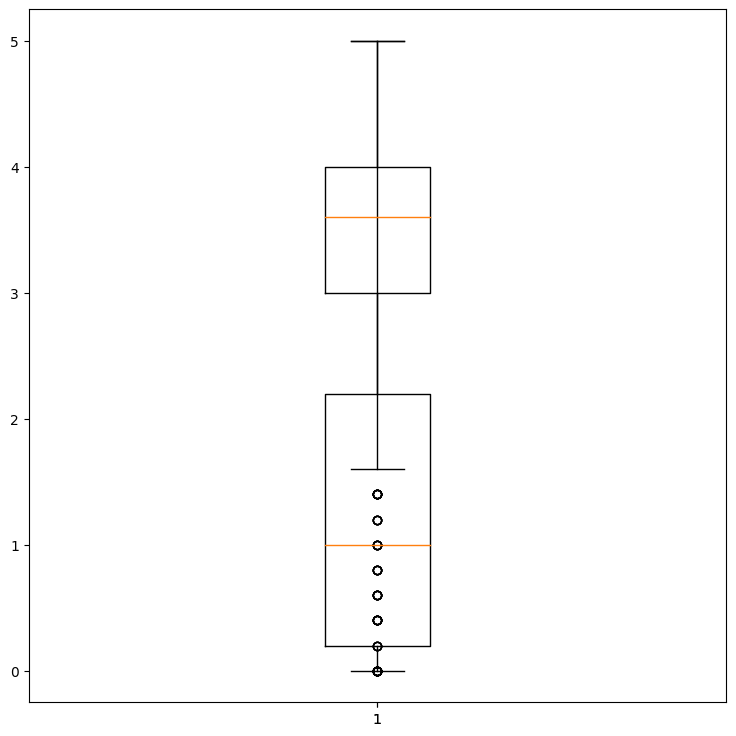

In [147]:
import matplotlib.pyplot as plt

x1 = train_df[train_df['source'] == 'nsmc-sampled']
x2 = train_df[train_df['source'] == 'nsmc-rtt']

x1_ = [i for i in range(len(x1))]
x2_ = [j for j in range(len(x2))]

plt.figure(figsize=(9, 9))
# plt.scatter(x1_, x1['label'], s=10, c='red')
# plt.scatter(x2_, x2['label'], s=10)



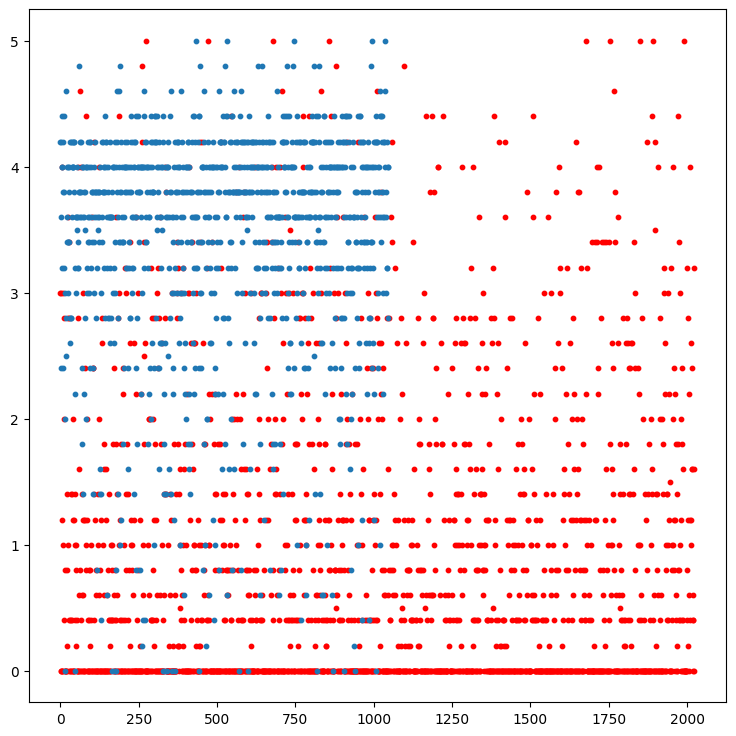

In [149]:
x3 = train_df[train_df['source'] == 'slack-sampled']
x4 = train_df[train_df['source'] == 'slack-rtt']

x3_ = [i for i in range(len(x3))]
x4_ = [j for j in range(len(x4))]

plt.figure(figsize=(9, 9))
plt.scatter(x3_, x3['label'], s=10, c='red')
plt.scatter(x4_, x4['label'], s=10)

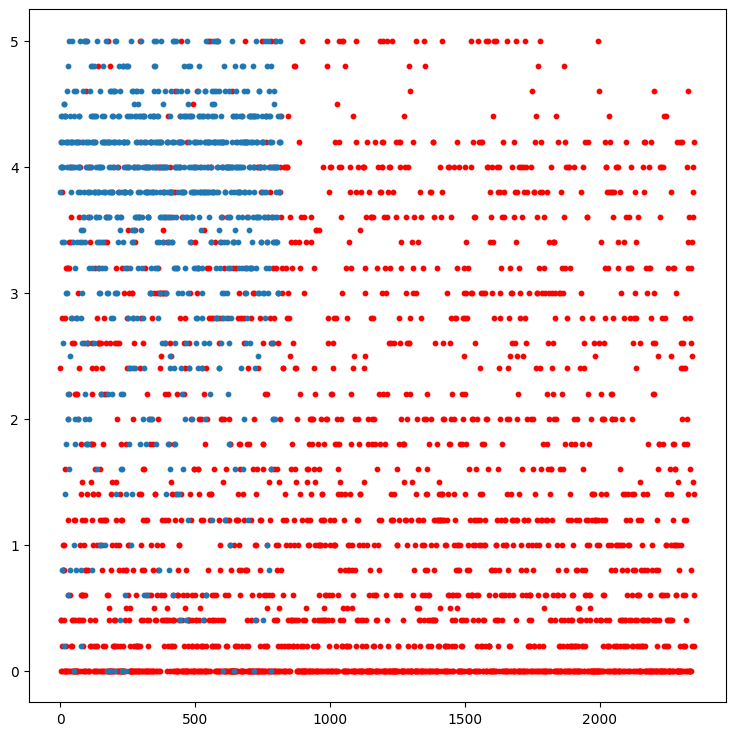

In [150]:
x5 = train_df[train_df['source'] == 'petition-sampled']
x6 = train_df[train_df['source'] == 'petition-rtt']

x5_ = [i for i in range(len(x5))]
x6_ = [j for j in range(len(x6))]

plt.figure(figsize=(9, 9))
plt.scatter(x5_, x5['label'], s=10, c='red')
plt.scatter(x6_, x6['label'], s=10)

In [151]:
x2_list = list(x2['label'])
x1_list = list(x1['label'])
nsmc_s_tensor = torch.FloatTensor(x1_list[:len(x2_list)])
nsmc_r_tensor = torch.FloatTensor(x2_list)

print(pearson(nsmc_r_tensor, nsmc_s_tensor))

x3_list = list(x3['label'])
x4_list = list(x4['label'])

slack_s_tensor = torch.FloatTensor(x3_list[:len(x4_list)])
slack_r_tensor = torch.FloatTensor(x4_list)

print(pearson(slack_s_tensor, slack_r_tensor))

x5_list = list(x5['label'])
x6_list = list(x6['label'])

petition_s_tensor = torch.FloatTensor(x5_list[:len(x6_list)])
petition_r_tensor = torch.FloatTensor(x6_list)

print(pearson(petition_s_tensor, petition_r_tensor))

tensor(0.0446)
tensor(0.0292)
tensor(0.0364)


[array([1., 1.]),
 array([3.6, 3.6]),
 array([0.4, 0.4]),
 array([3.6, 3.6]),
 array([1., 1.]),
 array([3.8, 3.8])]

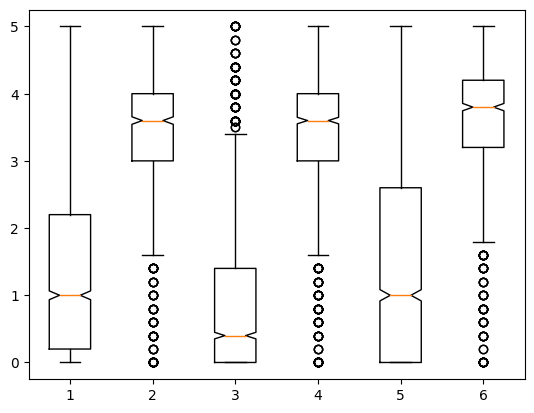

In [154]:
box = plt.boxplot([x1['label'], x2['label'], x3['label'], x4['label'], x5['label'], x6['label']], notch=True)
medians = [item.get_ydata() for item in box['medians']]
medians

In [160]:
x6['label'].describe()

count    817.000000
mean       3.590208
std        1.048120
min        0.000000
25%        3.200000
50%        3.800000
75%        4.200000
max        5.000000
Name: label, dtype: float64

[발견한 점]
1. sample의 개수가 rtt의 개수보다 많다.
2. sample 이 rtt보다 비교적 낮은 label을 가지고 있다.
3. 즉 rtt가 상대적으로 sample보다 높은 점수 주로 4점대? 를 가지고 있다.

source별로 모델 돌리면? 데이터 수가 적다..
source별로 데이터를 봐보자


### 텍스트 전처리
- ㅋㅋ 나 ㅎㅎ같은 단어들 지워보기(ㅋㅋㅋ, ㅎㅎㅎ, ㅜㅜ, ㅠㅠ, )
    - 지우는게 나을지 ㅋ하나 ㅎ 하나로 대체하는게 나을지?
- !, ~ 여러개 있는거 하나로 통함
boostcamp-sts-v1-train-397,slack-rtt,ㅋㅋ물안경 뭔데욬ㅋㅋ,하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하하,0.0,0.0
위와 같이 한쪽 문장 의미가 아예 없을 경우는 어떻게 하는게 좋을지?



In [4]:
import re

def make_one_chars(sentence):
    # sentence = re.subn(s+'+',s, sentence)[0]
    sentence = re.subn('ㅋ+', 'ㅋ', sentence)[0]
    sentence = re.subn('ㅎ+', 'ㅎ', sentence)[0]
    sentence = re.subn(';+', ';', sentence)[0]
    sentence = re.subn('!+', '!', sentence)[0]
    sentence = re.subn('\?+', '?', sentence)[0]
    sentence = re.subn('ㅠ+', 'ㅠ', sentence)[0]
    sentence = re.subn('~+', '~', sentence)[0]

    return sentence
# def make_kh_one(sentence):
#     while "ㅋㅋ" in sentence:
#         sentence.replace("ㅋㅋ", "ㅋ")
#     while "ㅎㅎ" in sentence:
#         sentence.replace("ㅎㅎ", "ㅎ")
#     return sentence

def remove_char(sentence): #ㅋㅋㅋ 나 ㅎㅎ가 연속으로 나오는거 필요 없을 수도 있으니 아예 제거하는
    # pattern = re.compile('[ㅋ+]')
    sentence = re.sub('[ㅋ+]', '', sentence)
    sentence = re.sub('[ㅎ+]', '', sentence)
    return sentence


In [5]:
df_test = train_df
# df_test['sentence_1']
test1 = []
test2 = []
# i = 0
for s in train_df['sentence_1']:
    sen_temp = s
    sen_temp = make_one_chars(sen_temp)
    test1.append(sen_temp)
    # i += 1
for s in train_df['sentence_2']:
    sen_temp = s
    sen_temp = make_one_chars(sen_temp)
    test2.append(sen_temp)



print(df_test)

                               id            source  \
0      boostcamp-sts-v1-train-000      nsmc-sampled   
1      boostcamp-sts-v1-train-001         slack-rtt   
2      boostcamp-sts-v1-train-002  petition-sampled   
3      boostcamp-sts-v1-train-003     slack-sampled   
4      boostcamp-sts-v1-train-004     slack-sampled   
...                           ...               ...   
9319  boostcamp-sts-v1-train-9319  petition-sampled   
9320  boostcamp-sts-v1-train-9320  petition-sampled   
9321  boostcamp-sts-v1-train-9321  petition-sampled   
9322  boostcamp-sts-v1-train-9322     slack-sampled   
9323  boostcamp-sts-v1-train-9323  petition-sampled   

                                  sentence_1  \
0     스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~   
1                       앗 제가 접근권한이 없다고 뜹니다;;   
2                             주택청약조건 변경해주세요.   
3                     입사후 처음 대면으로 만나 반가웠습니다.   
4                                 뿌듯뿌듯 하네요!!   
...                                      ...   
931

### 띄어쓰기, 맞춤법 고치기 py-Hanspell 사용

In [1]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-kc3zyfoc
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4838 sha256=8064e32065ae51cf7ff52e5b88e68daee2733fb44126ddc412e4f4a99cc18273
  Stored in directory: /tmp/pip-ephem-wheel-cache-n702hl3z/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [6]:
from hanspell import spell_checker

fixed_test1 = []
fixed_test2 = []

for s in test1:
    try:
        fixed_test1.append(spell_checker.check(s).checked)
    except:
        fixed_test1.append(s)
        print('error1')
for s in test2:
    try:
        fixed_test2.append(spell_checker.check(s).checked)
    except:
        fixed_test2.append(s)
        print('error2')

# df_test['sentence_1'] = fixed_test1
# df_test['sentence_2'] = fixed_test2

error1
error1
error1
error1
error1
error1
error1
error2
error2
error2
error2


In [7]:
df_test['sentence_1'] = fixed_test1
df_test['sentence_2'] = fixed_test2

In [10]:
csv = df_test.to_csv('./processed_hanspell_1.csv',index=False)

In [9]:
df_test

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고, 사랑도 있고 재미도 있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근 권한이 없다고 뜹니다;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택 기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯하네요!,꼬옥 실제로 한번 뵈어요 뿌 뿌 푸~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야 합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합 니드,여성가족부 폐지를 청원합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급 좀 줄여주세요,공무원 봉급 좀 줄이지 좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 트라이 하기로 해요!,오늘 못 먹은 밥은 꼭 담에 먹기로 하고요!,3.2,1.0


### 불용어 처리